In [1]:
from numpy import loadtxt, unique, array, concatenate, zeros, hstack, where, mean, std, linspace
from Phd import fitmatlab
from numpy import matlib
from lmfit import Model
import pickle as pkl
import plotly.graph_objects as go
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as ms
#font = "sans-serif"#'tex gyre heros'  # an open type font
#mpl.rcParams['font.sans-serif'] = font
plt.rc('font', family='serif')
#mpl.rc('mathtext', fontset='custom')
mpl.rc('font', size=14)  # change font size from default 10
ms.use('default')
#mpl.rc('text', usetex=True)
%matplotlib inline
%config InlineBackend.figure_format="retina"


def sigmoidal(X,a,b,c,d):
    from numpy import exp
    return (a-b)/(1+exp((d-X)/c))+b

In [2]:
#Carga de archivos y fijación de parámetros y máscaras
neurometria=loadtxt("/home/sparra/MEGA/Prpy/Neurometria_Fourier_RR033.csv", delimiter=',', dtype=float)
r, _=(neurometria.shape)
tactil=[7, 8, 9, 10 ,11, 12]# Índices relacionados a la neuro tactil
acustico=[13, 14, 15, 16, 17, 18]  # Indices auditivos
indexes={"serie":0, "electrodo":1, "unidad":2, "3b":3, "CR":4, "setN":5, "setId":6}
#0   #Serie o matfile
#1      #Electrode
#2       #Unit
#3     #3b?
#4      #CR
#5      #Set Num
#6        #Set Id 
# máscaras
sets=unique(neurometria[:,indexes["setId"]])
maskCR1=neurometria[:, indexes["CR"]]==1
maskCR2=neurometria[:, indexes["CR"]]==2
maskCR3=neurometria[:, indexes["CR"]]==3
mask3b=neurometria[:, indexes["3b"]]==1
# amplitudes 
DicsetT={"1":[0,4,14,16,20, 24],"6":[0, 4, 8, 10, 14, 24], "11":[0, 4 ,8, 12, 14, 24], "13":[0,4,10,16,20,24]}

ampT=[0, 4, 8, 10, 12, 14, 16, 20, 24]
ampA=[0]; ampA.append(fitmatlab(array([0.006, 0.1, 0.5, 1, 2.5])))
ampA=array(ampA)
ampA=hstack(ampA)

# Generación de vector con separación total para la realización del ajuste
xT_tot=zeros((1200),dtype=float)
yT_tot=zeros((1200),dtype=float)

#Carga de los valores de psicofísica
#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
file=open("Psicof_Uncertainty_RR033.pickle", "rb")
psicofRR033=pkl.load(file)
file.close()

---
# CR=1 mono: RR033
---

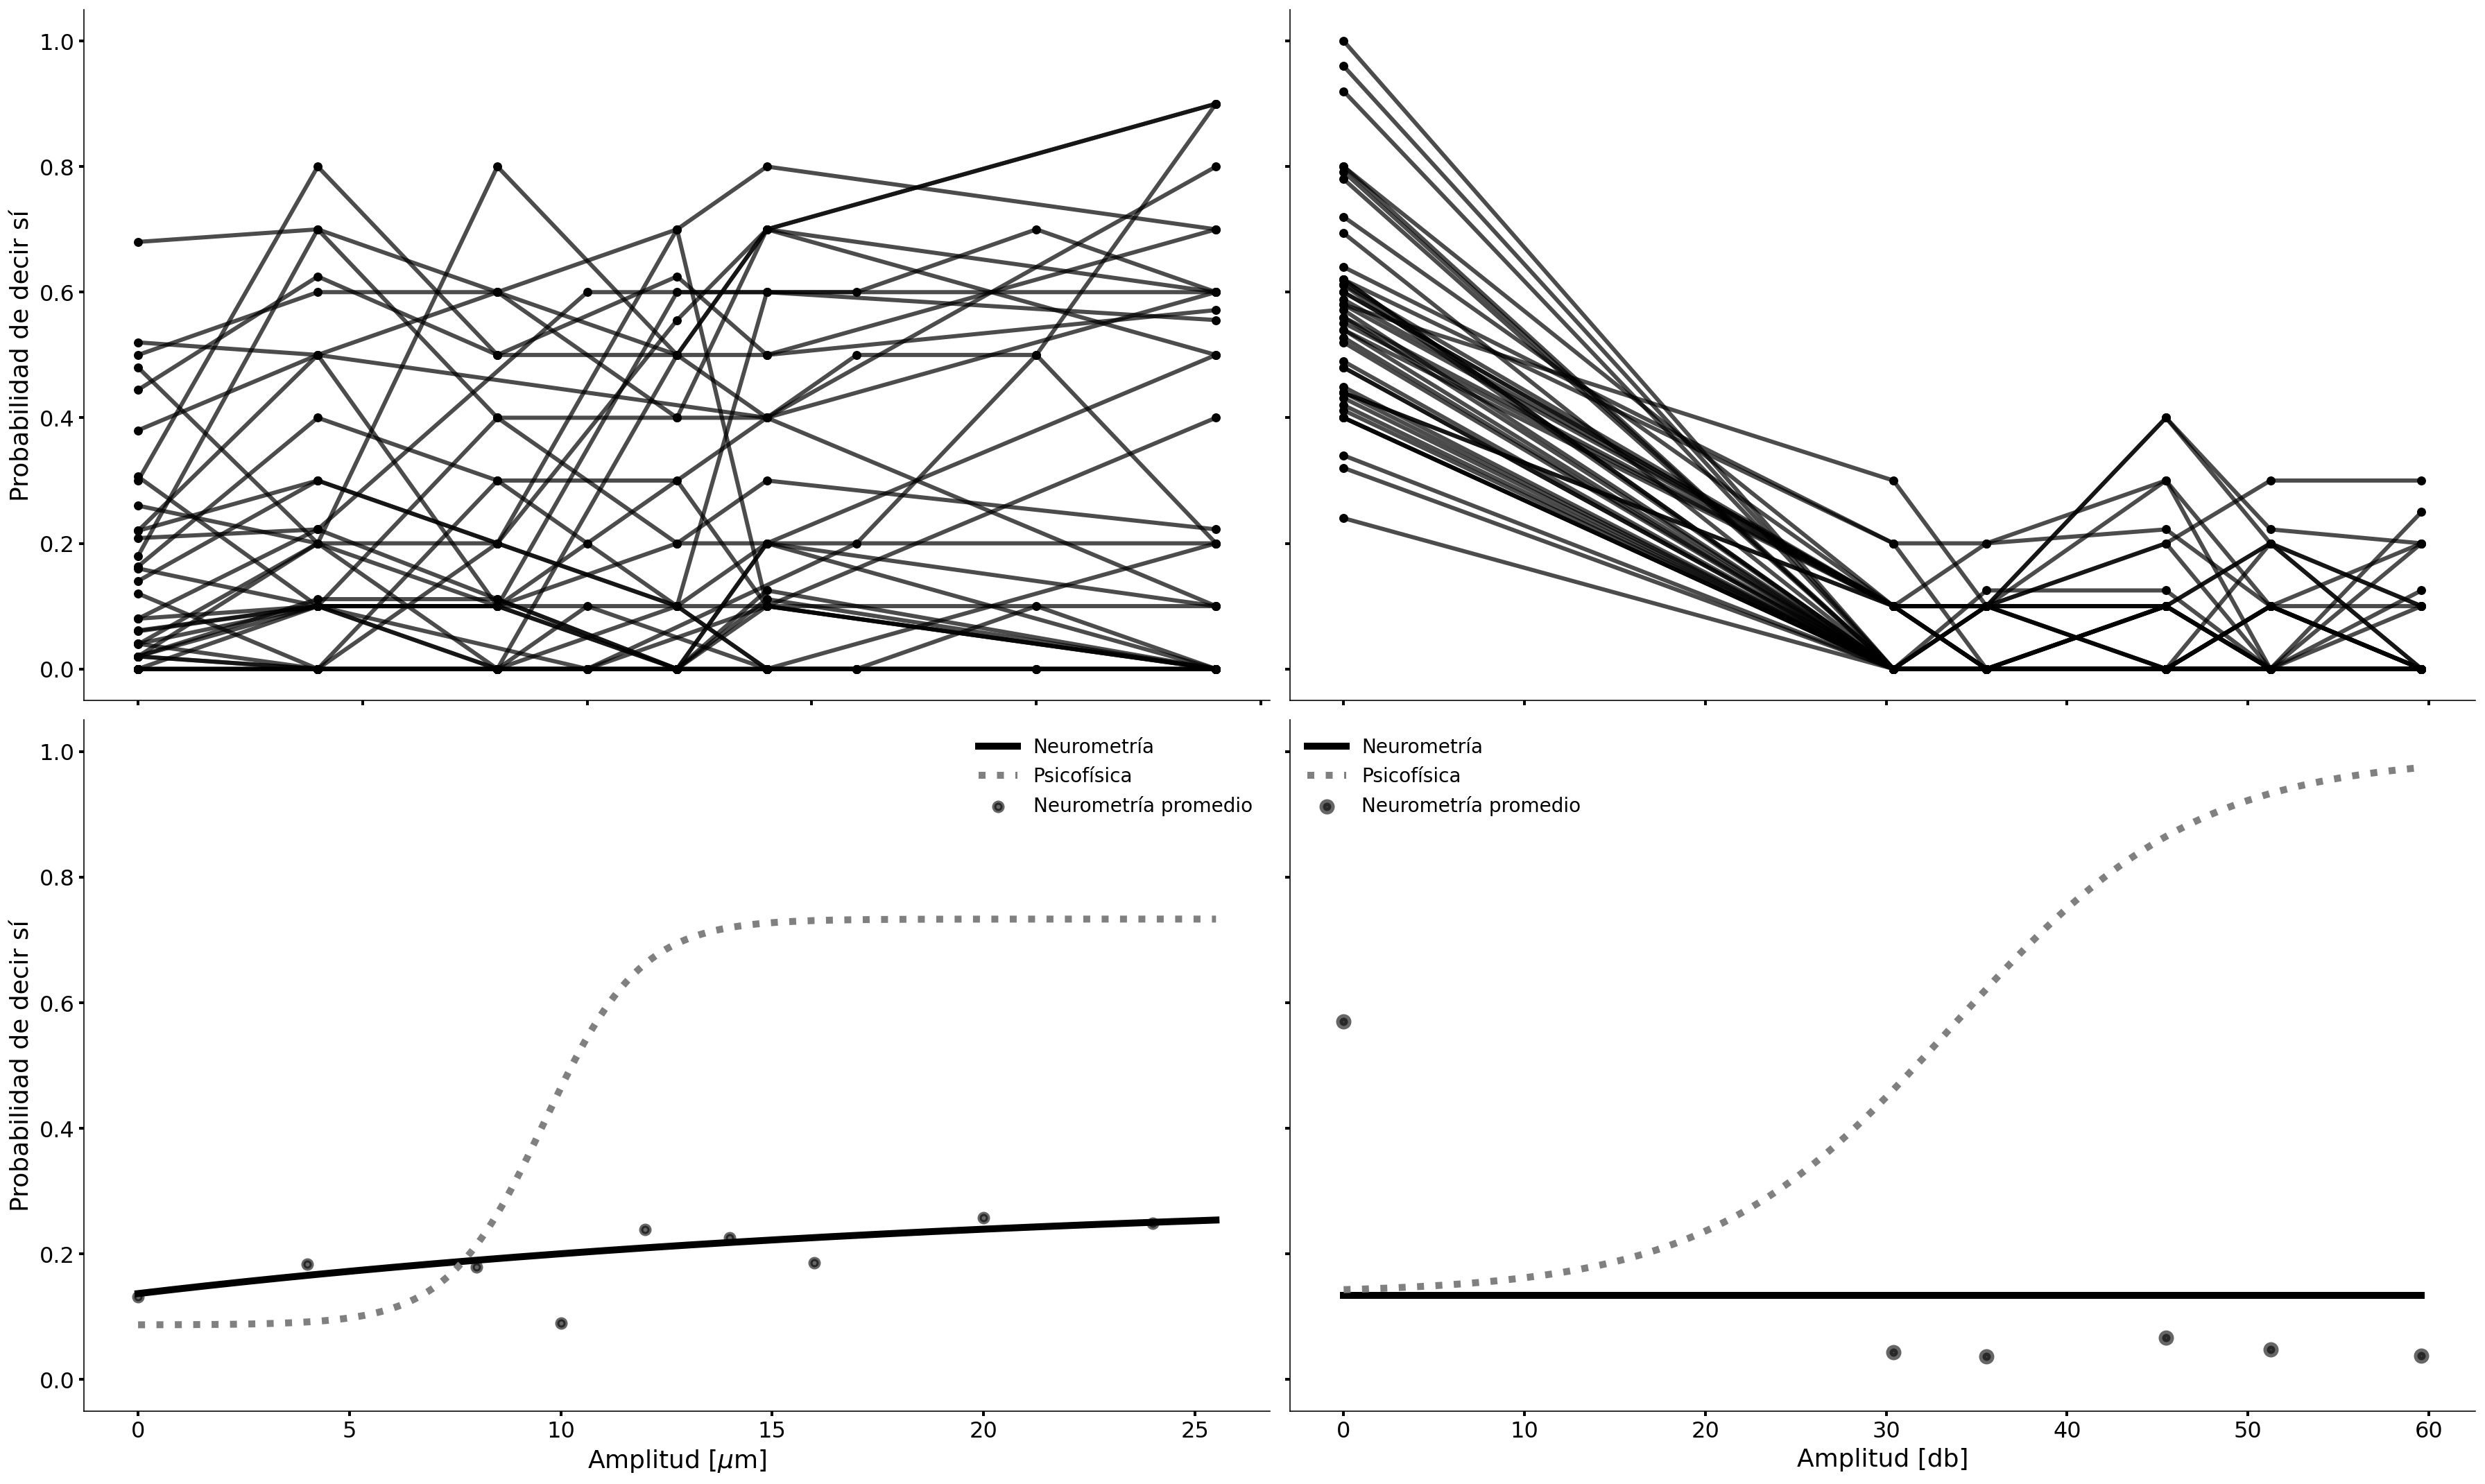

In [3]:
donde=where(maskCR1==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(25, 15), sharey=True, frameon=False)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 


axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=16, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=16, fontweight="normal")
plt.yticks(fontsize=16, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=16, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])

cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=3)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR1,:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR1,:])[:, acustico],axis=0), color="black", alpha=0.6, lw=5, label="Neurometría promedio")
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

#    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
    
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=3, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Plot la psicofísica
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout() 
                
fig.savefig("Fourier_Neurometría_CR=1_RR033.svg", dpi=700)

## CR=1 neuronas en el área 1 de la corteza somatosensorial

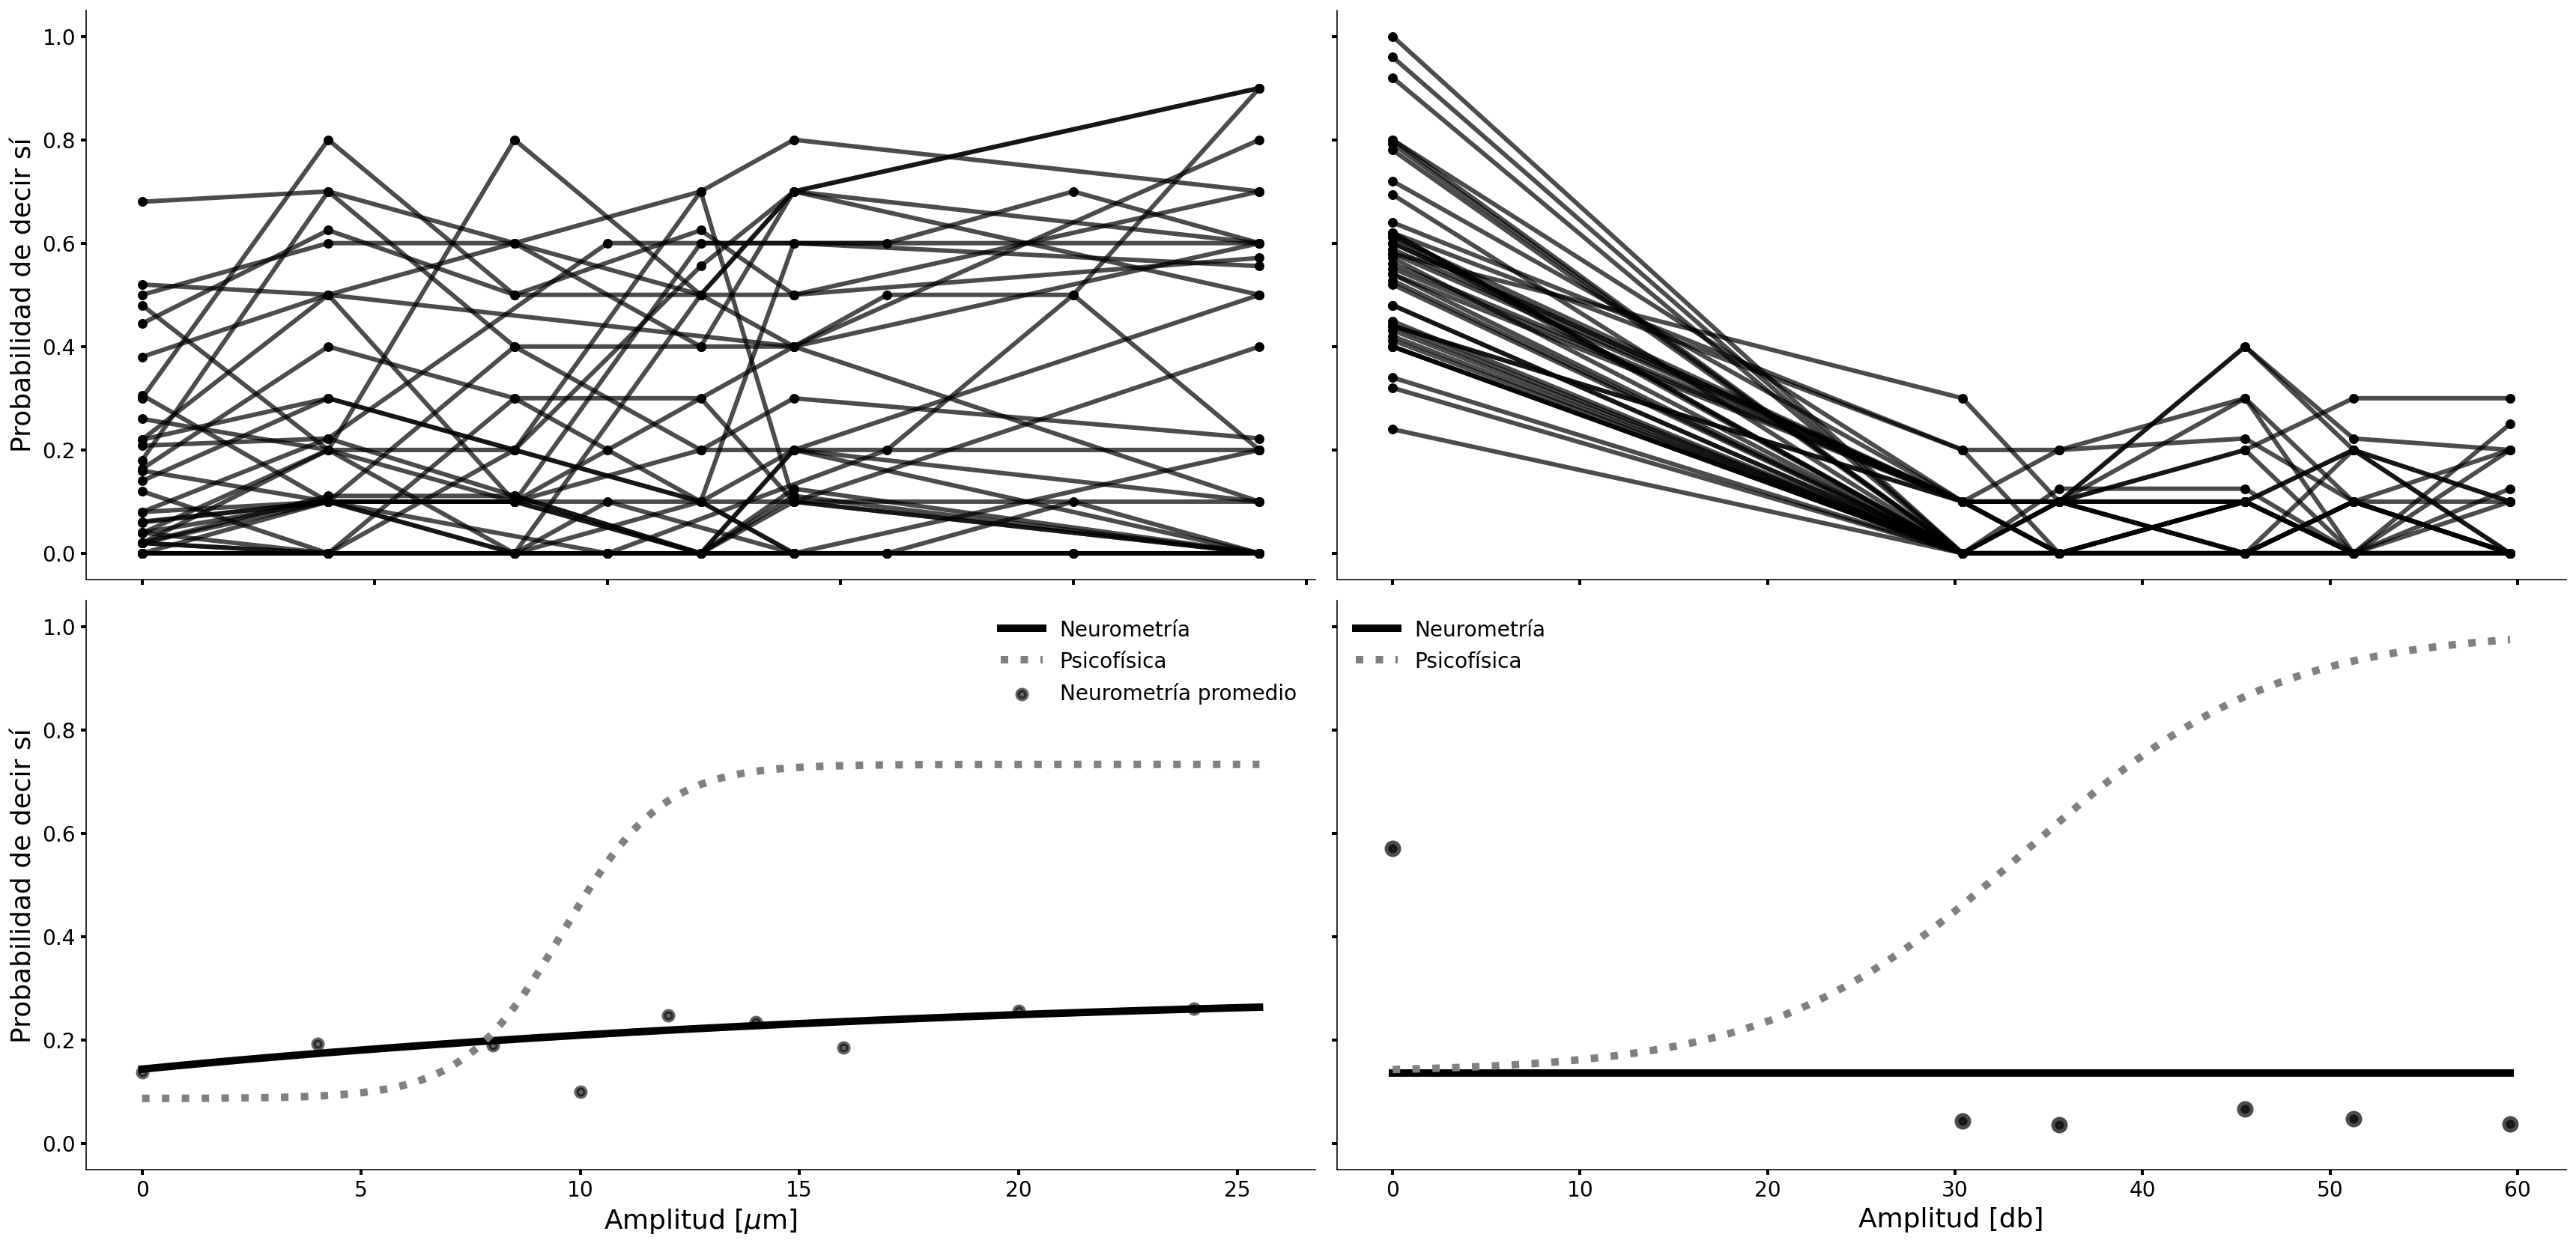

In [4]:
donde=where( (maskCR1*(~mask3b))==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(12*2, 9*1.3), sharey=True)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 

# axes[0, 1].set_xlabel("Amplitud [db]", fontsize=16, fontweight="normal")
# axes[0, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
# axes[1, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=14, fontweight="normal")
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=14, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])

for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)


cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=3)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR1*(~mask3b),:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR1,:])[:, acustico],axis=0), color="black", alpha=0.7, lw=5)
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
    
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=3, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout()

fig.savefig("Fourier_Neurometría_CR=1_A1_RR033.svg", dpi=700)

## CR=1 neuronas en 3b de la corteza somatosensorial.

/home/sparra/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:

Mean of empty slice.

/home/sparra/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

/home/sparra/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning:

overflow encountered in exp



array([ 17, 127])

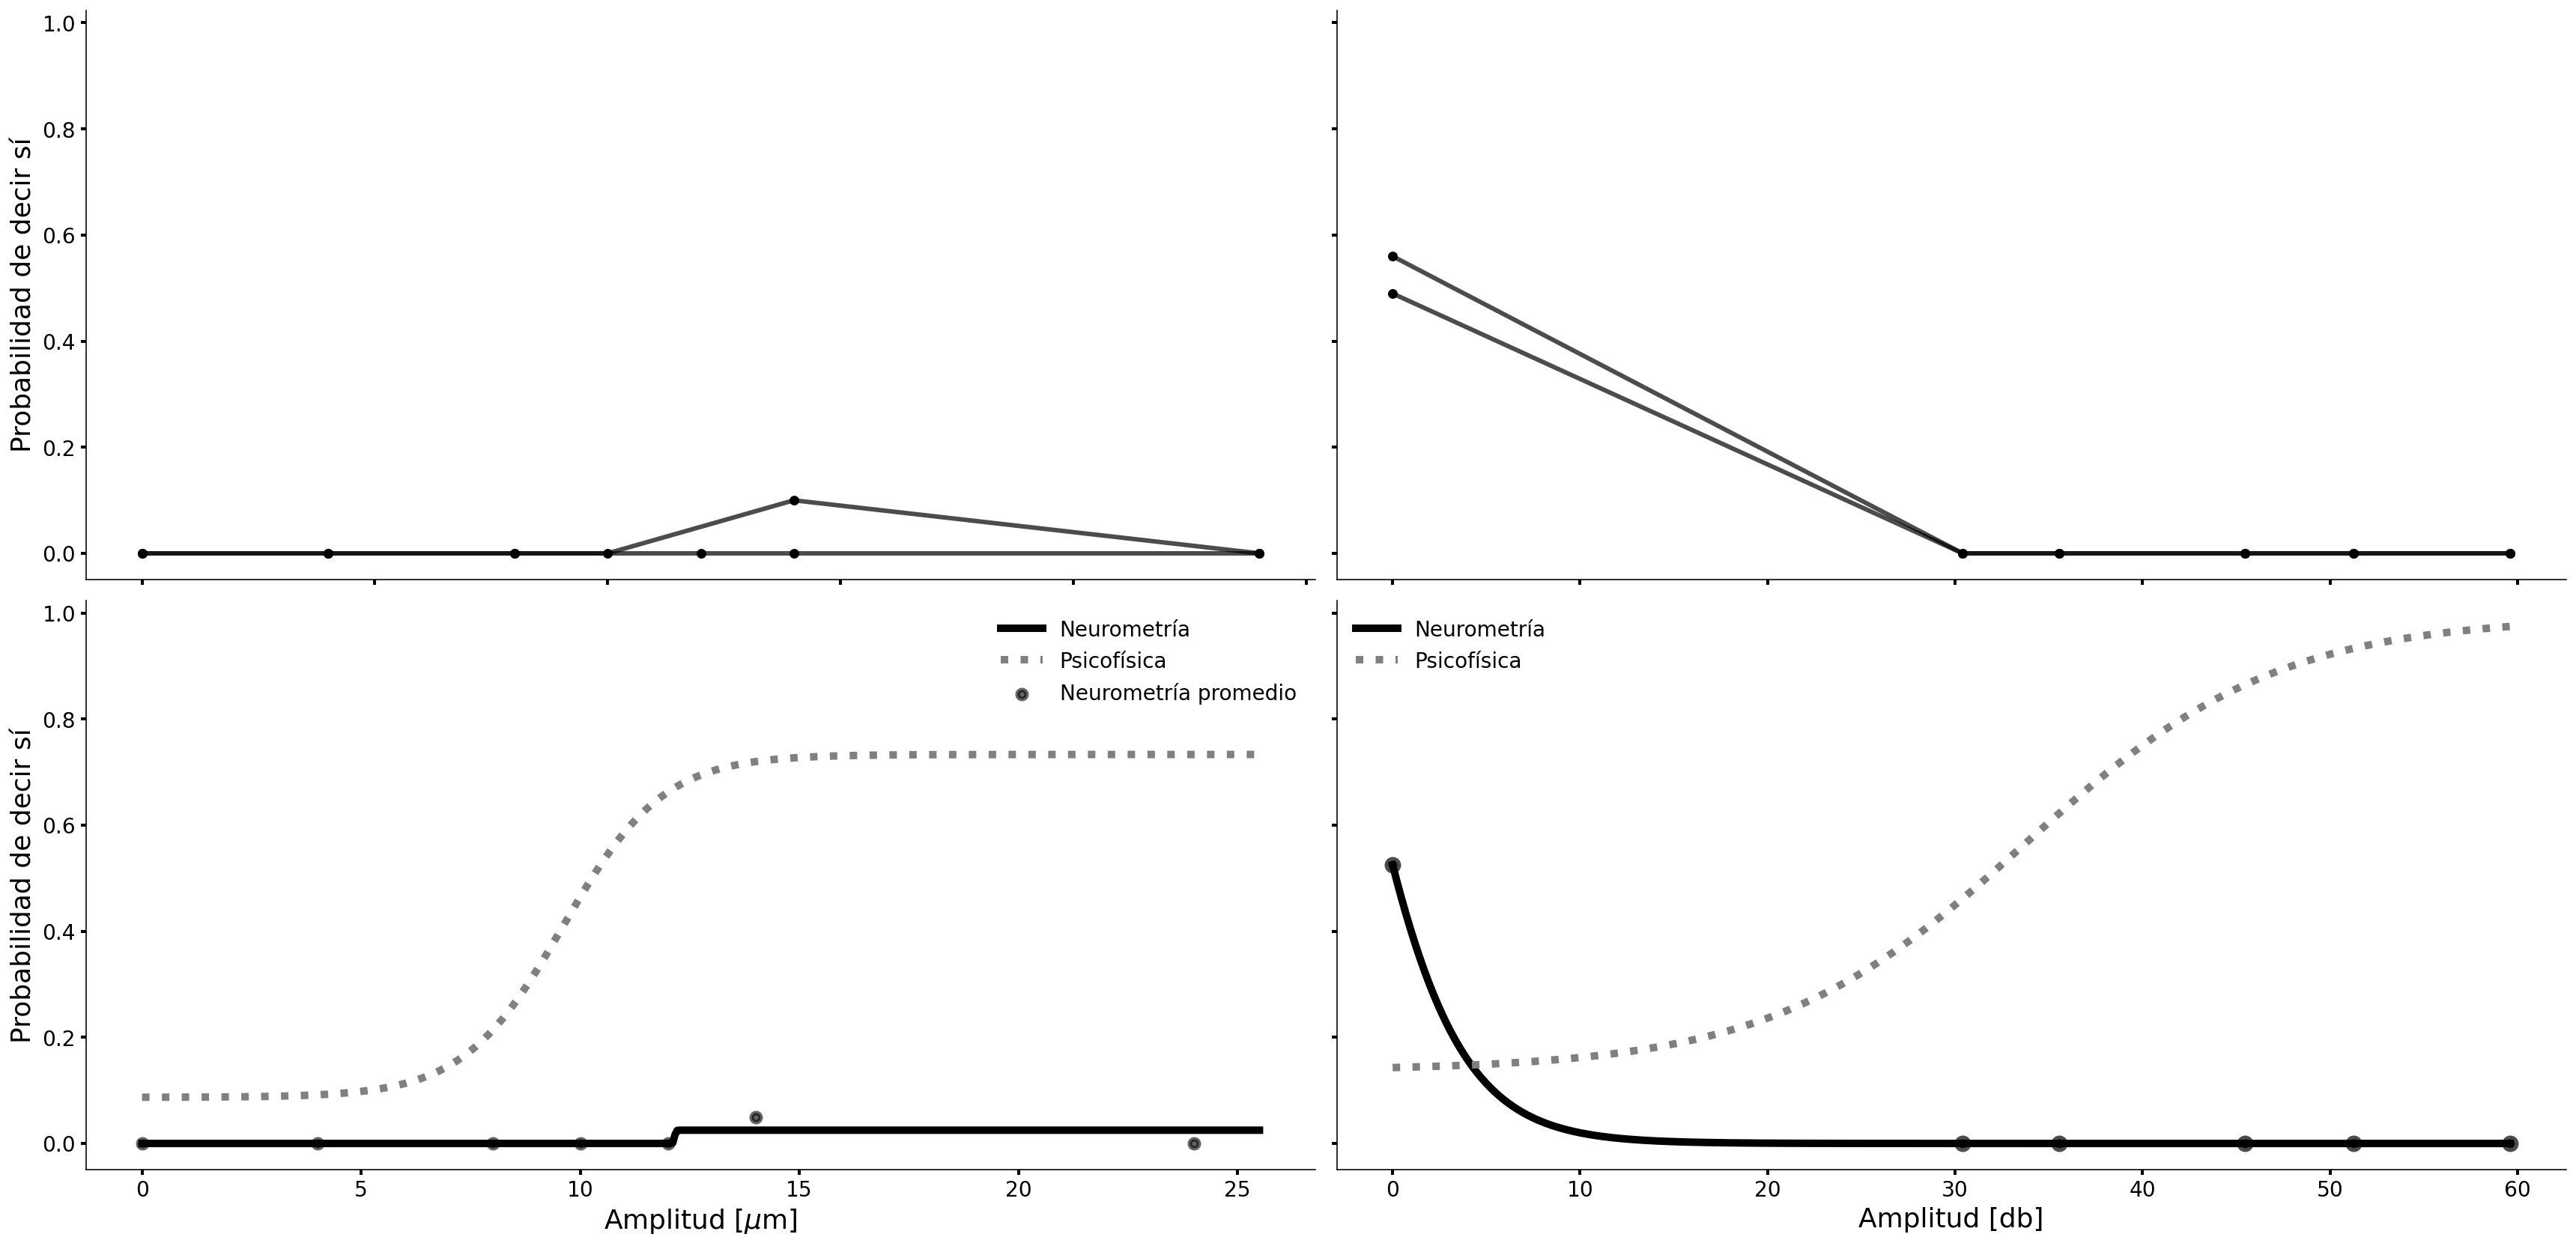

In [5]:
donde=where( (maskCR1*(mask3b))==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(12*2, 9*1.3), sharey=True)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 

# axes[0, 1].set_xlabel("Amplitud [db]", fontsize=16, fontweight="normal")
# axes[0, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
# axes[1, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=14, fontweight="normal")
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=14, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])
for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)

cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=3)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR1*(mask3b),:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR1*mask3b,:])[:, acustico],axis=0), color="black", alpha=0.7, lw=5)
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
    
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=3, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout()
#Gráfica el ajuste a la psicofísica RR032
#a: 0.855188, b: 0.038533, c: 1.347210,  d: 10.559623
fig.savefig("Fourier_Neurometría_CR=1_3b_RR033.svg", dpi=700)
donde

---
# CR=2 mono: RR033
---

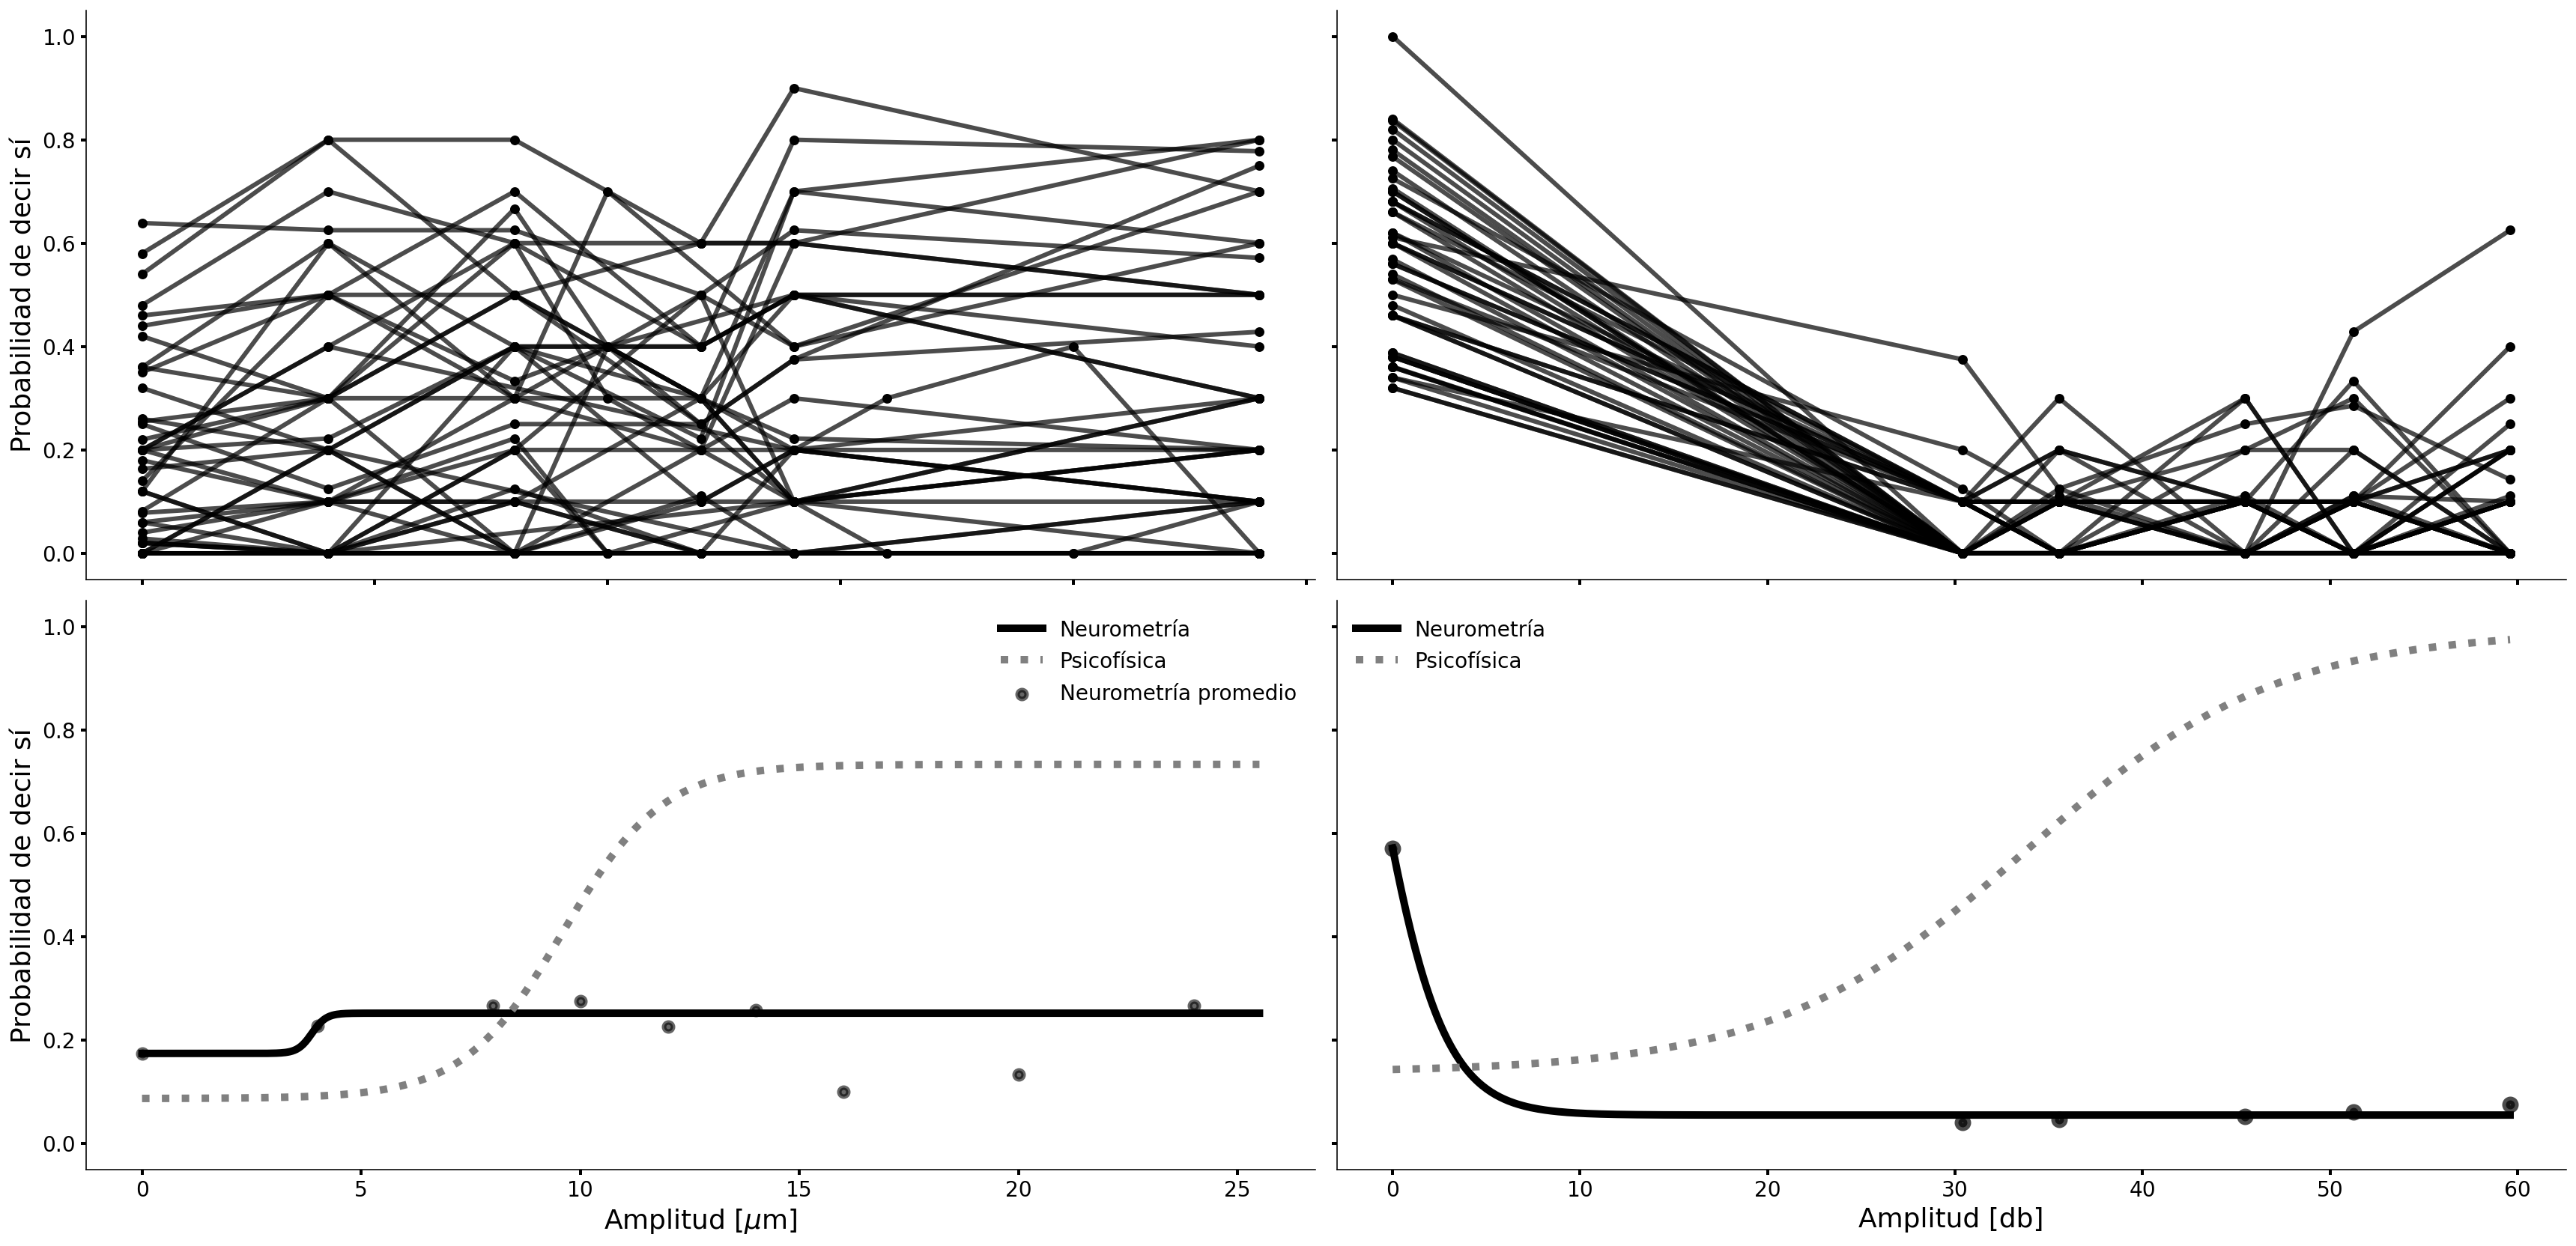

In [6]:
donde=where( (maskCR2)==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(12*2, 9*1.3), sharey=True)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 

# axes[0, 1].set_xlabel("Amplitud [db]", fontsize=16, fontweight="normal")
# axes[0, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
# axes[1, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=14, fontweight="normal")
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=14, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])
for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)

cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=3)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR2,:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR2,:])[:, acustico],axis=0), color="black", alpha=0.7, lw=5)
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
    
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=3, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout()
fig.savefig("Fourier_Neurometría_CR=2_RR033.svg", dpi=700)

## CR=2 Neuronas del área 1

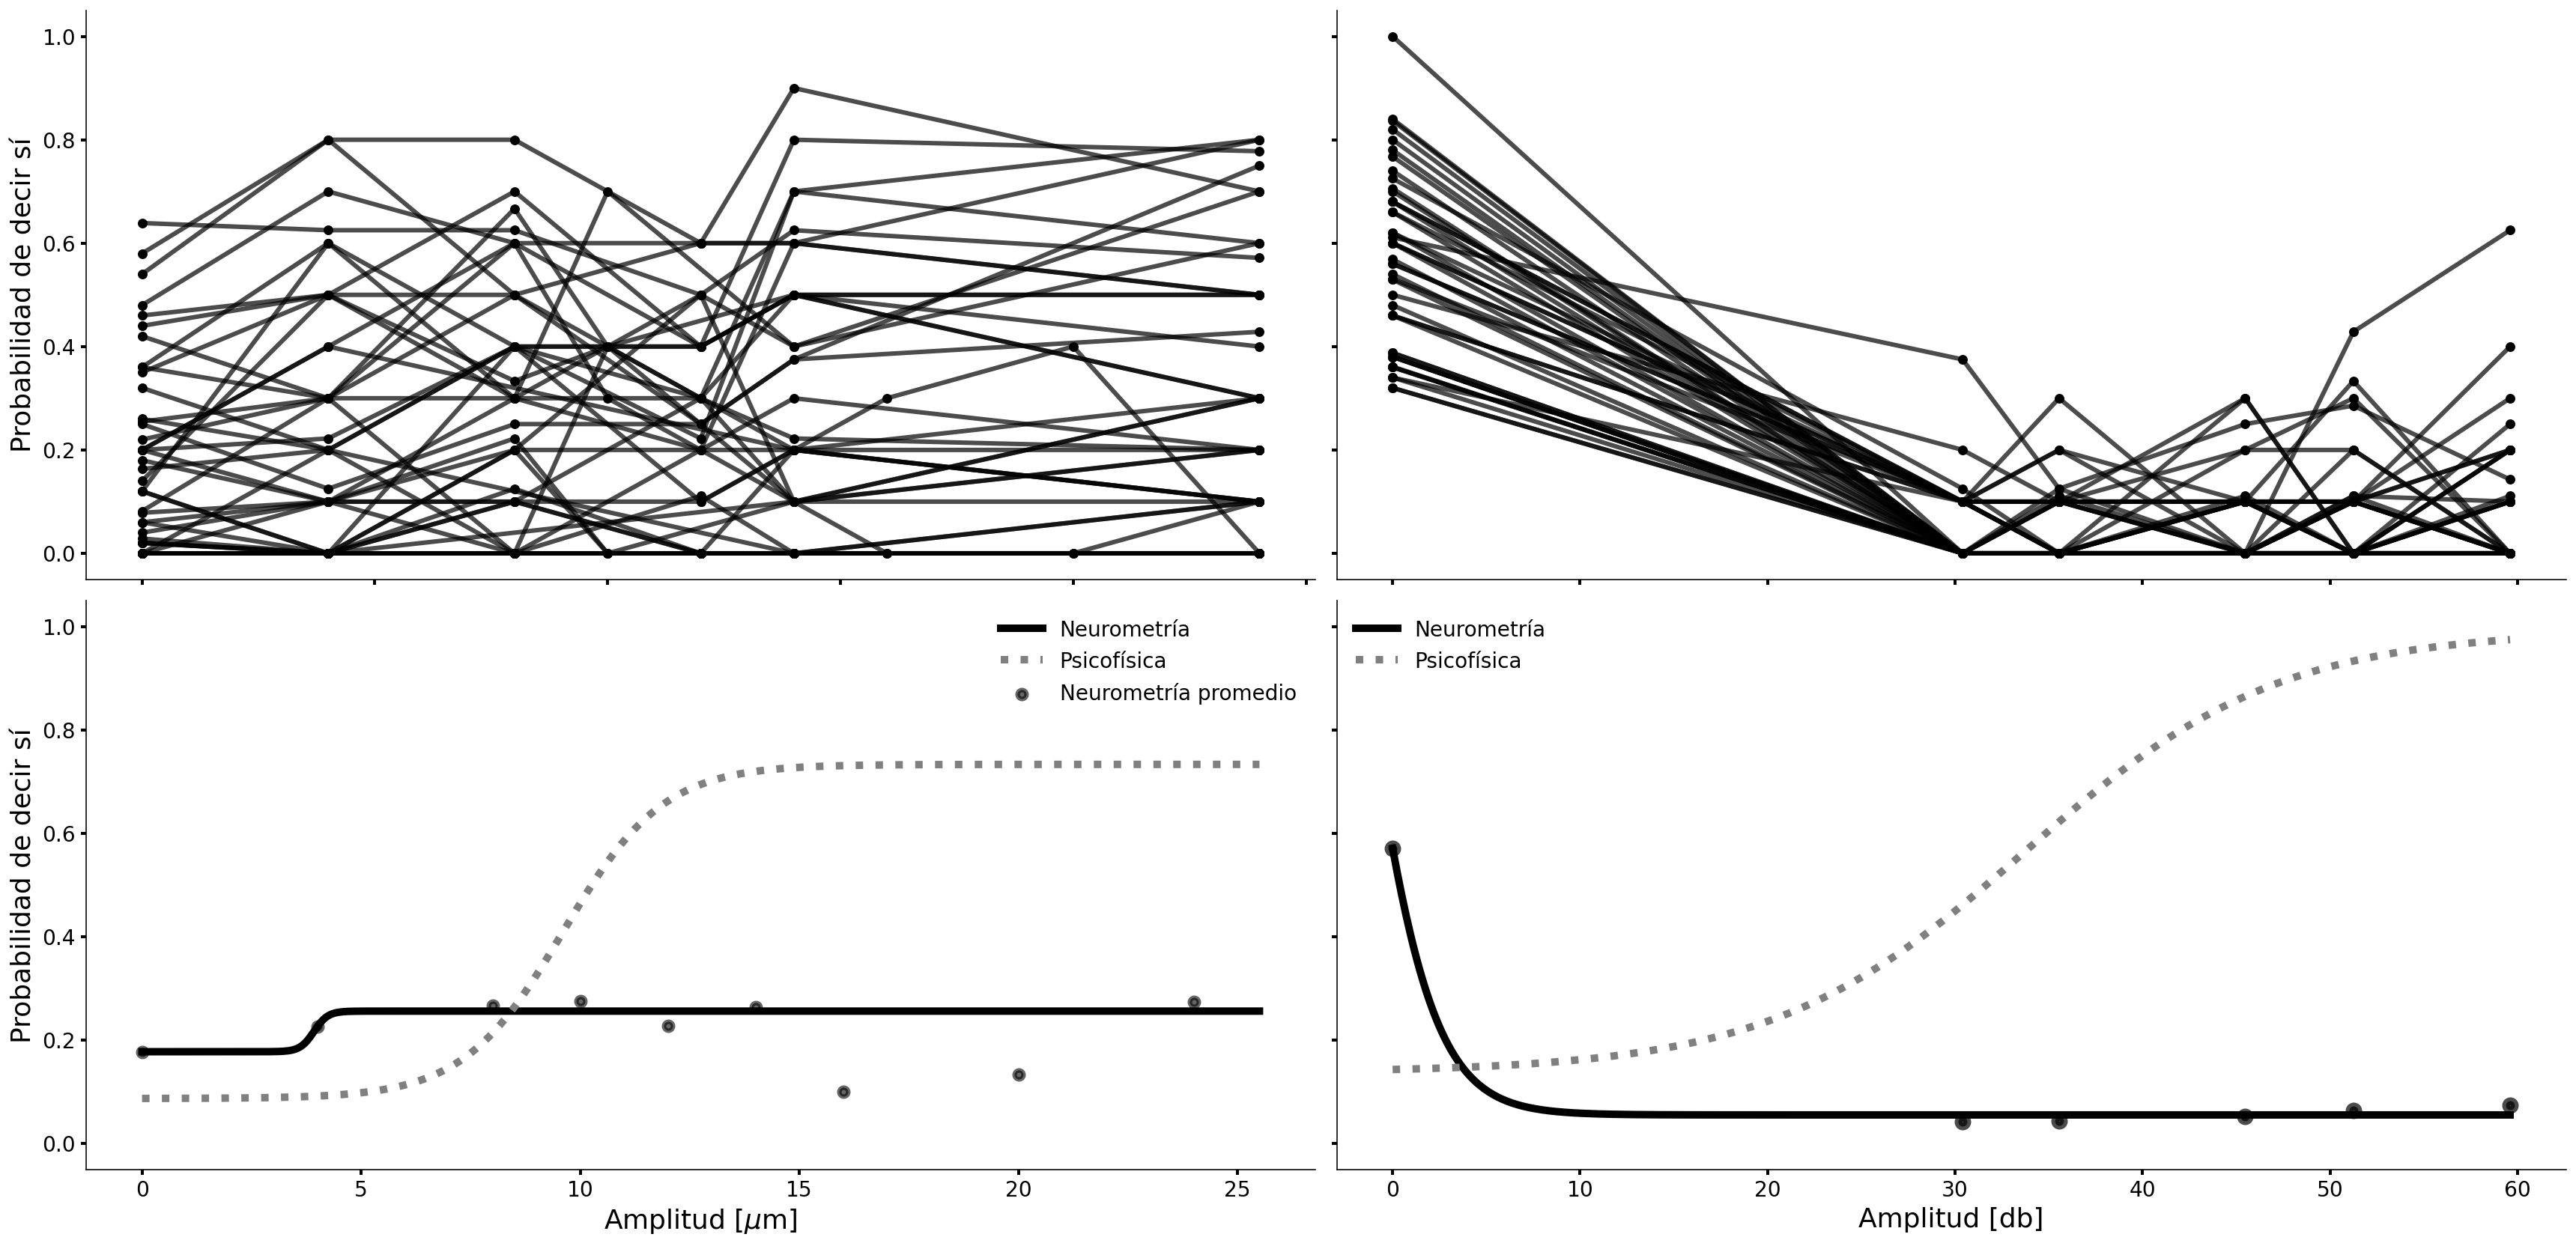

In [7]:
donde=where( (maskCR2*(~mask3b))==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(12*2, 9*1.3), sharey=True)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 

# axes[0, 1].set_xlabel("Amplitud [db]", fontsize=16, fontweight="normal")
# axes[0, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
# axes[1, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=14, fontweight="normal")
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=14, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])
for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)

cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=3)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR2*(~mask3b),:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR2*(~mask3b),:])[:, acustico],axis=0), color="black", alpha=0.7, lw=5)
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
     
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=3, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout()
#Gráfica el ajuste a la psicofísica RR032
#a: 0.855188, b: 0.038533, c: 1.347210,  d: 10.559623
fig.savefig("Fourier_Neurometría_CR=2_A1_RR033.svg", dpi=700)

/home/sparra/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:

Mean of empty slice.

/home/sparra/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



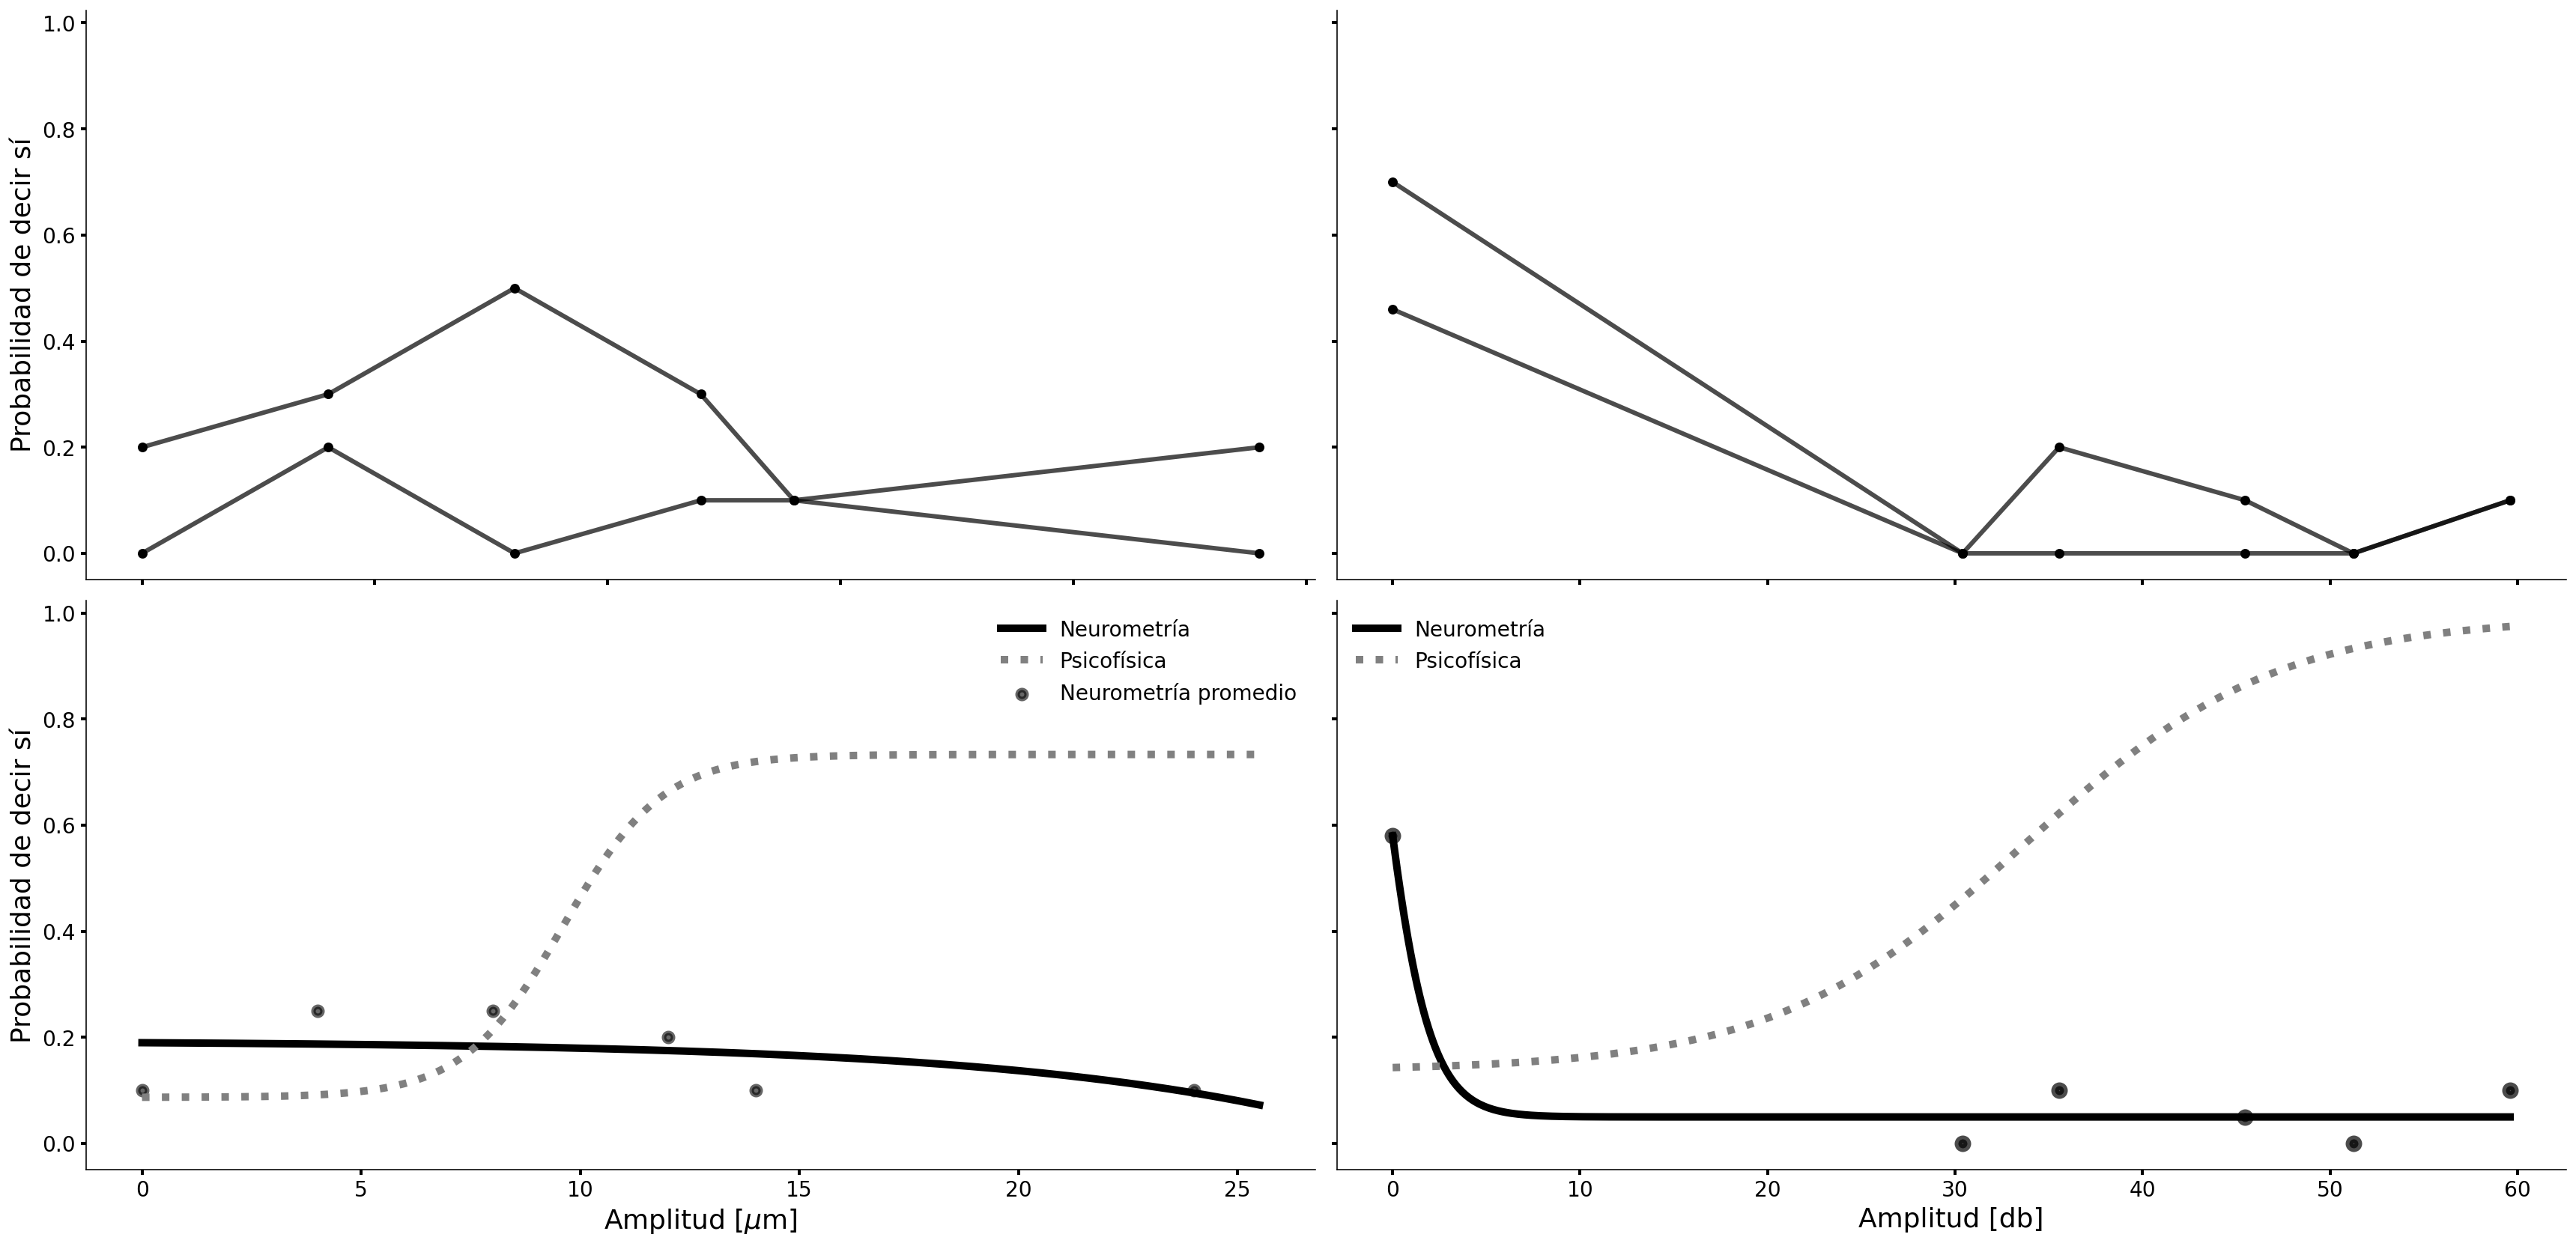

In [8]:
donde=where( (maskCR2*(mask3b))==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(12*2, 9*1.3), sharey=True)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 

# axes[0, 1].set_xlabel("Amplitud [db]", fontsize=16, fontweight="normal")
# axes[0, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
# axes[1, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=14, fontweight="normal")
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=14, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])

for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)

cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=3)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR2*(mask3b),:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR2*(mask3b),:])[:, acustico],axis=0), color="black", alpha=0.7, lw=5)
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
     
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=3, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout()
#Gráfica el ajuste a la psicofísica RR032
#a: 0.855188, b: 0.038533, c: 1.347210,  d: 10.559623
fig.savefig("Fourier_Neurometría_CR=2_3b_RR033.svg", dpi=700)

---
# CR=3  Mono 33
---

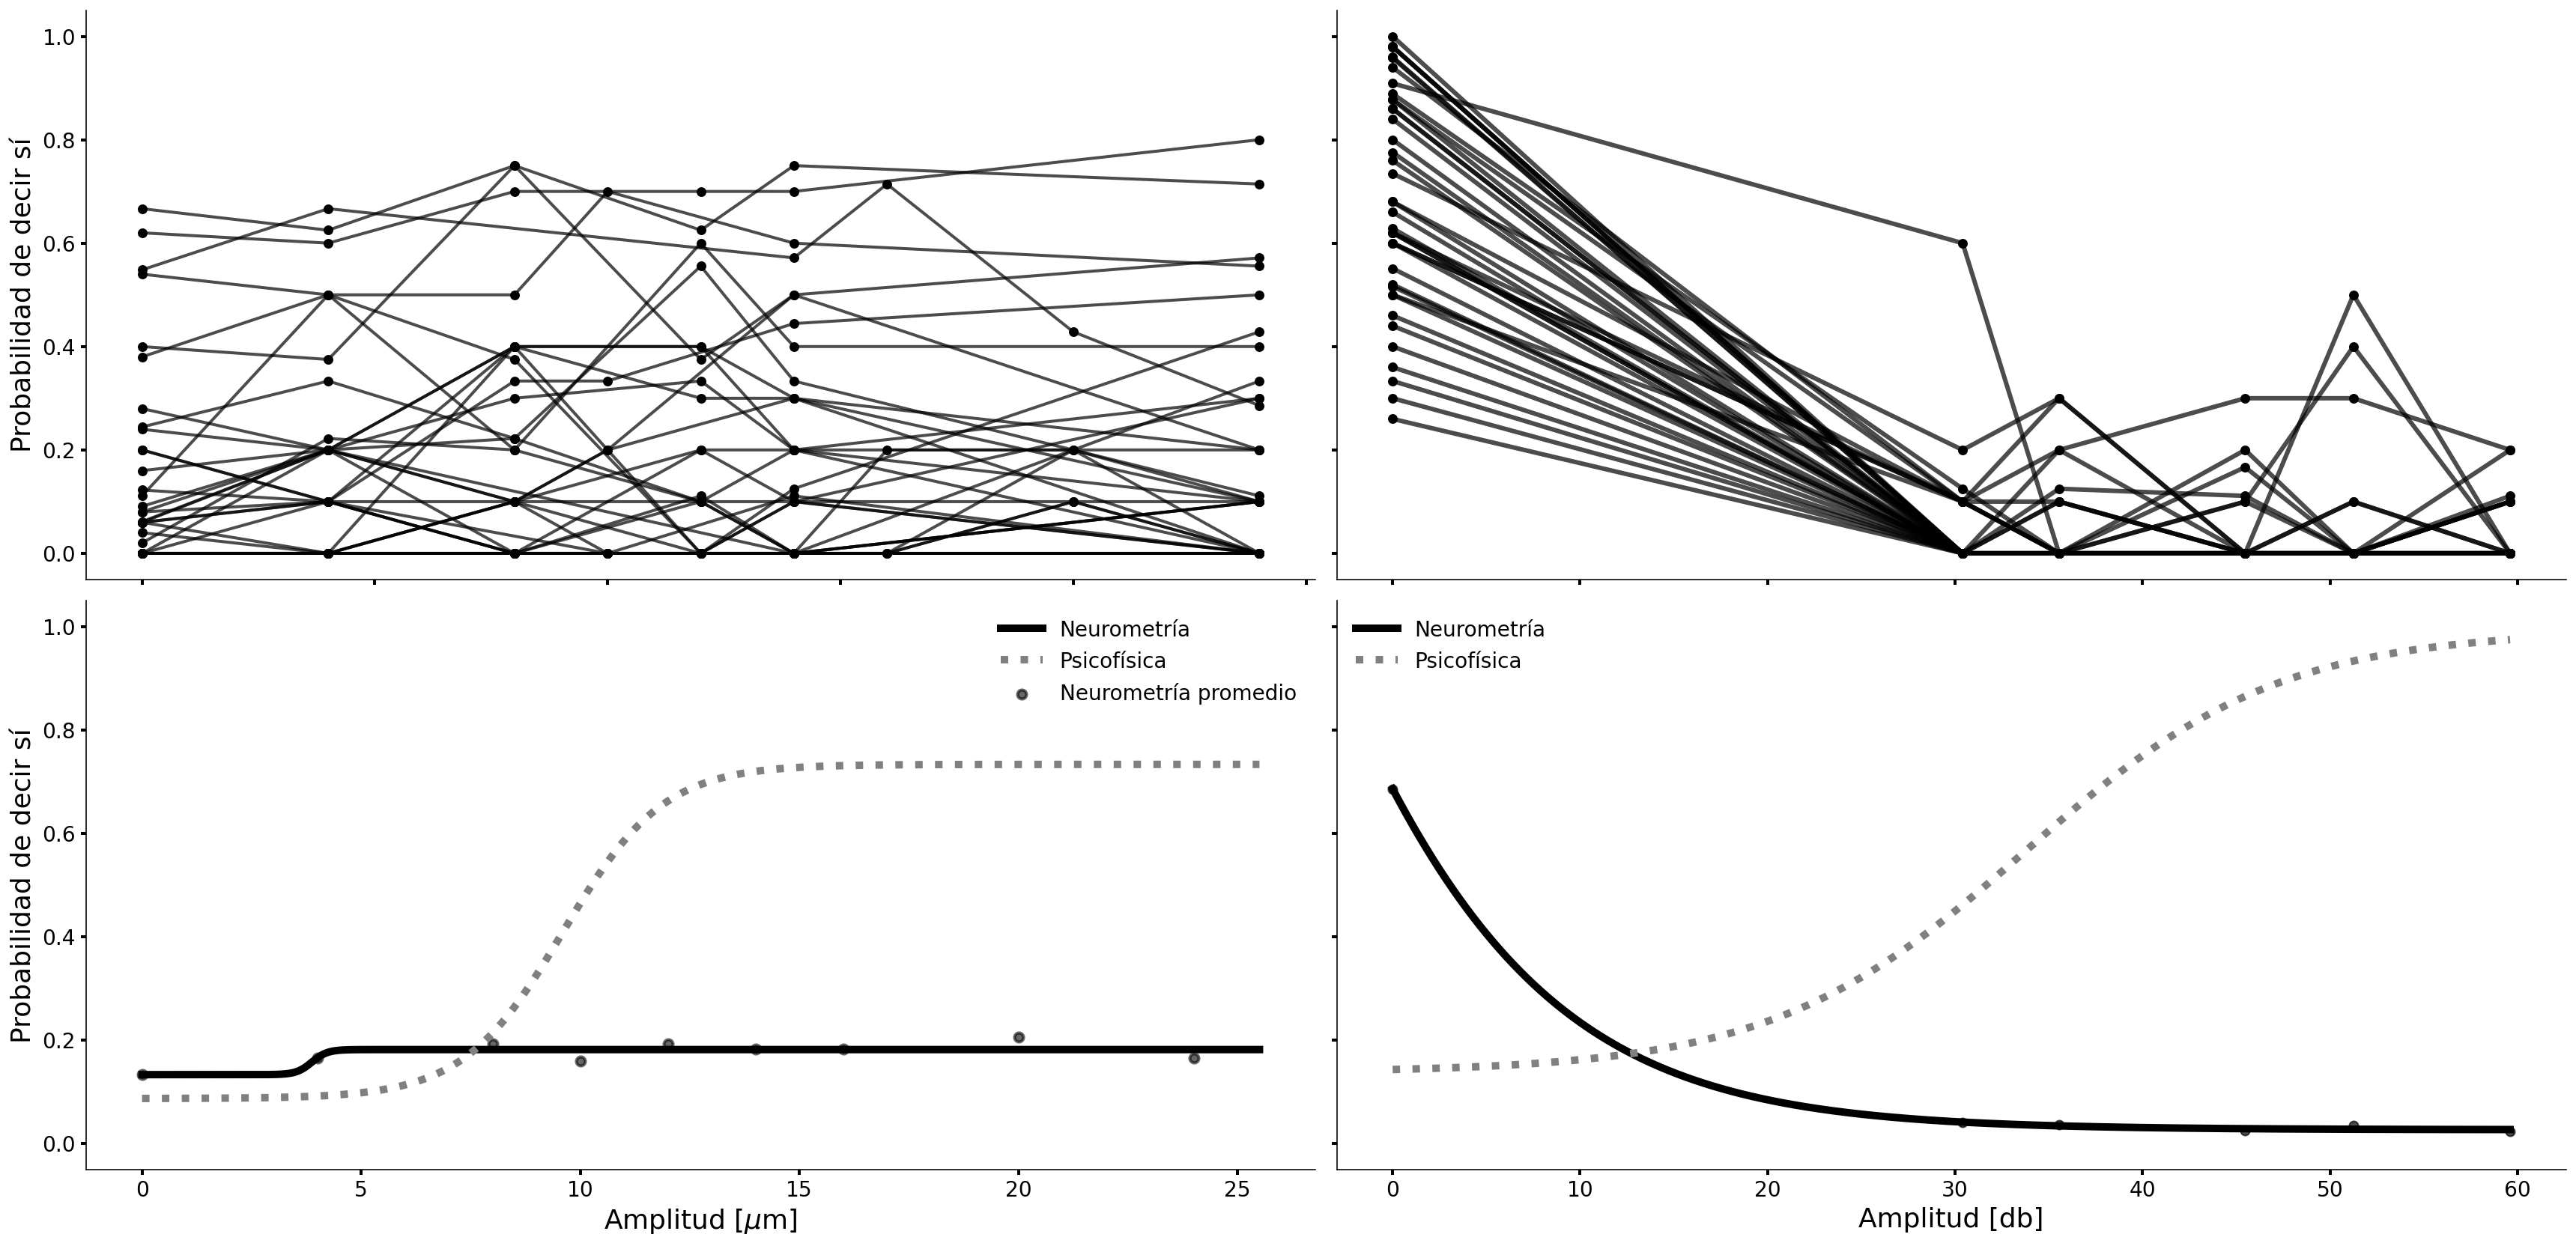

In [9]:
donde=where( (maskCR3)==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(12*2, 9*1.3), sharey=True)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 

# axes[0, 1].set_xlabel("Amplitud [db]", fontsize=16, fontweight="normal")
# axes[0, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
# axes[1, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=14, fontweight="normal")
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=14, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])
for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)

cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=2)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR3,:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR3,:])[:, acustico],axis=0), color="black", alpha=0.7)
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
     
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=2, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout()
#Gráfica el ajuste a la psicofísica RR032
#a: 0.855188, b: 0.038533, c: 1.347210,  d: 10.559623
fig.savefig("Fourier_Neurometría_CR=3_RR033.svg", dpi=700)

## CR=3 Neuronas del área 1

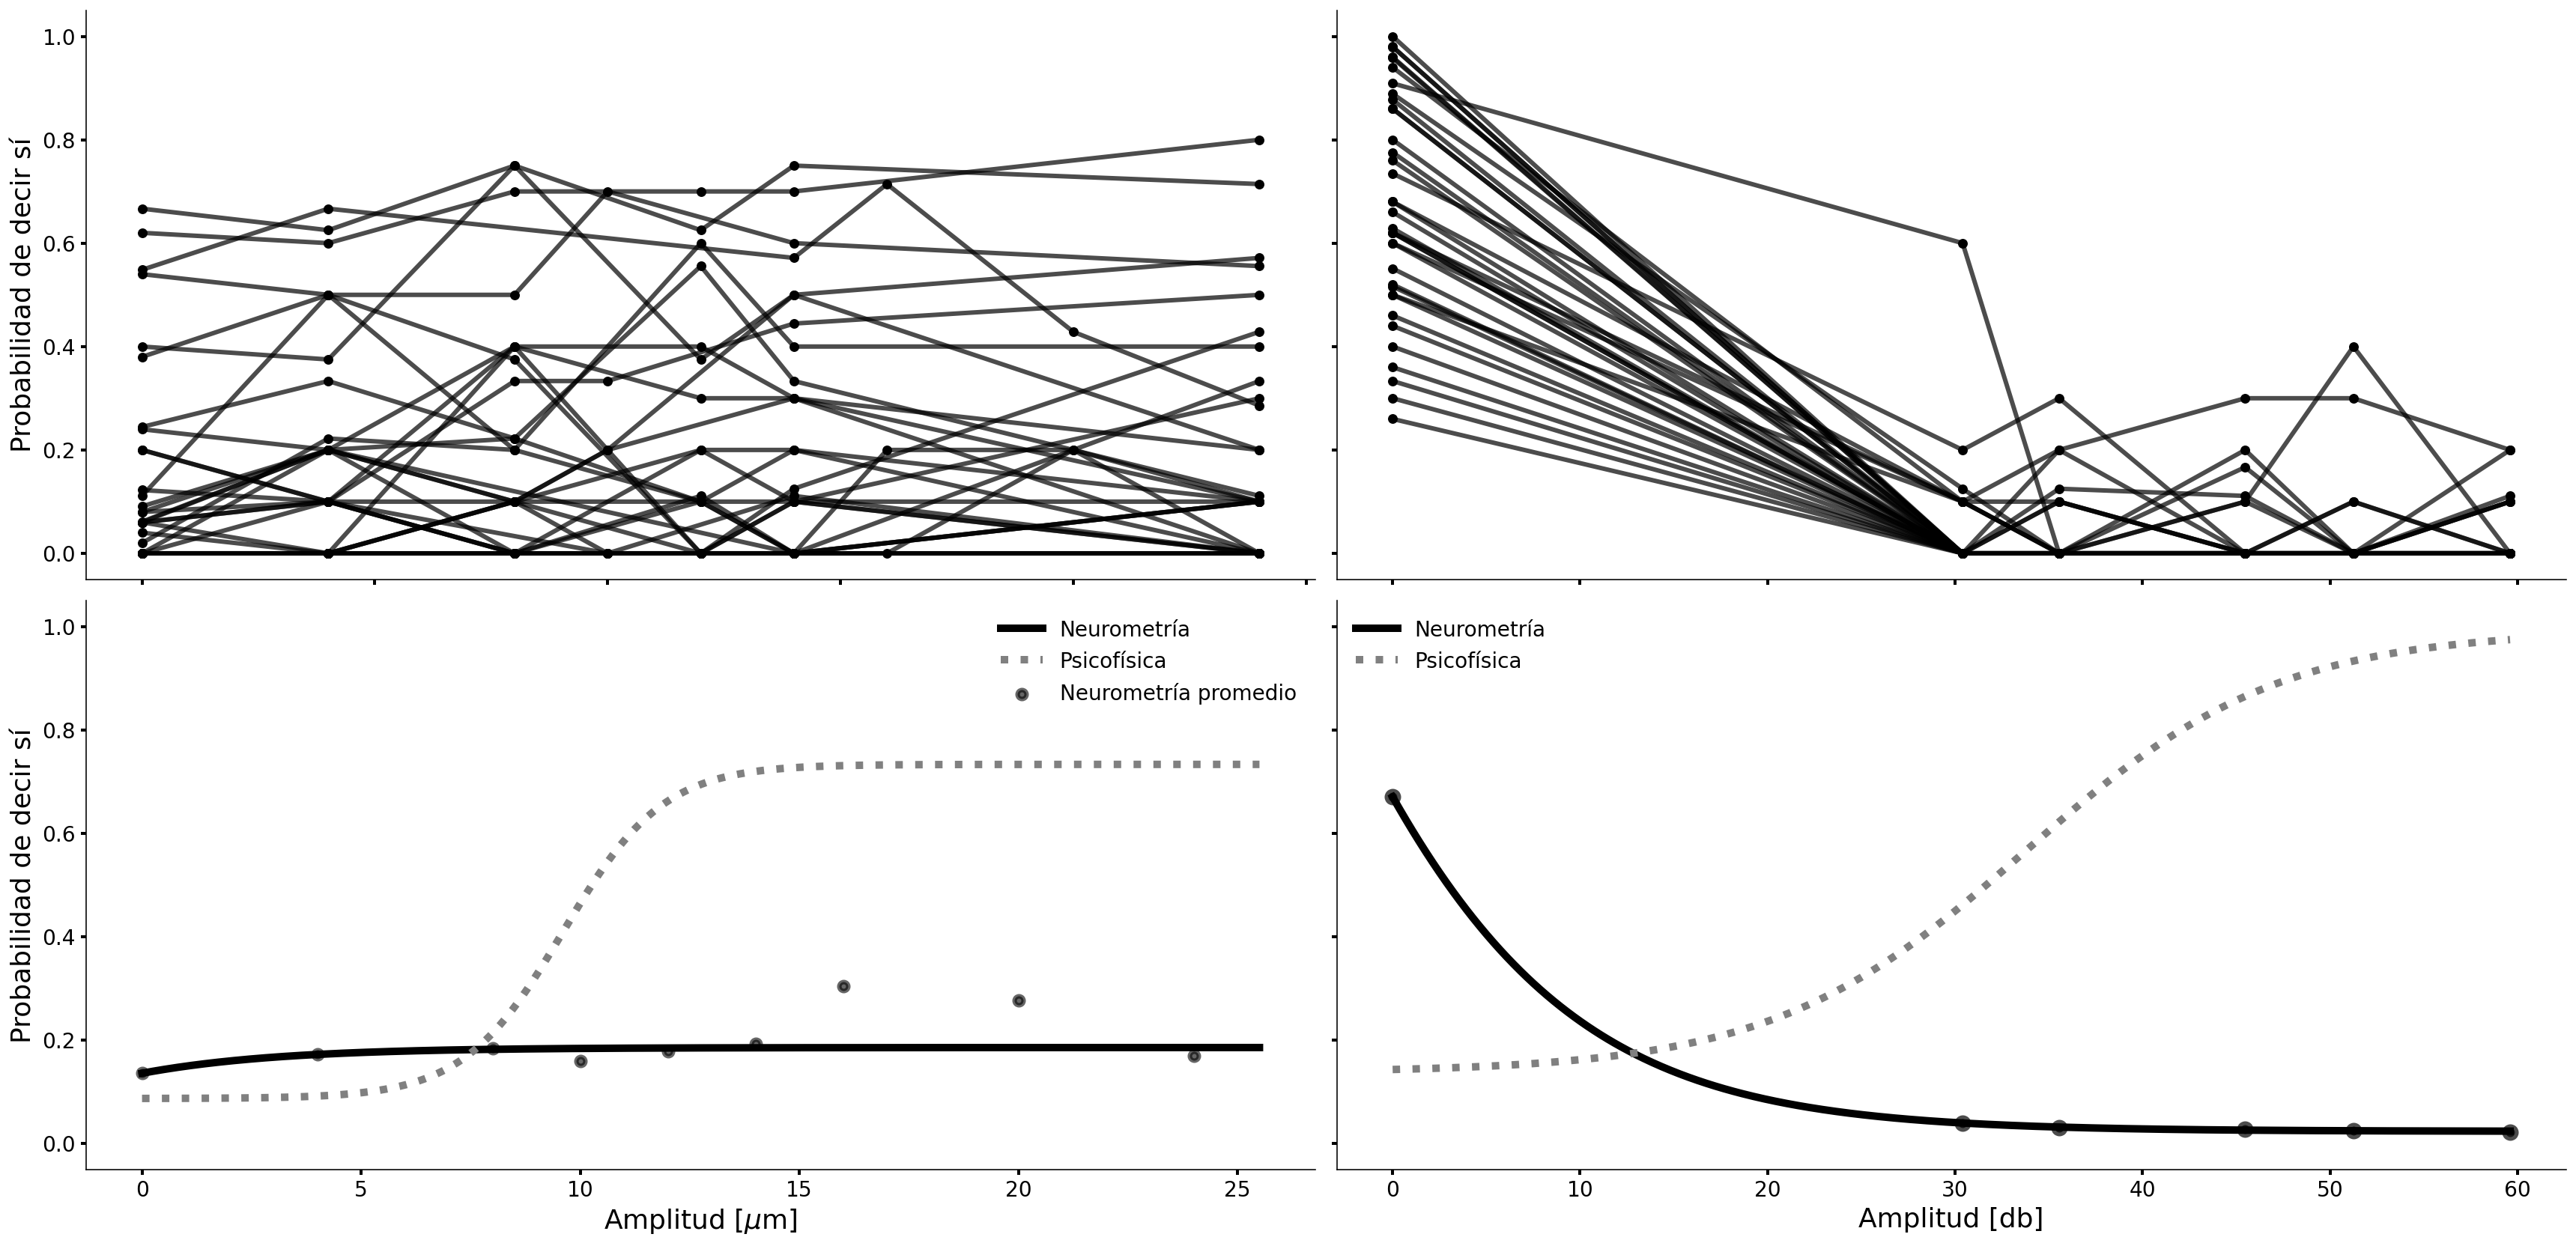

In [10]:
donde=where( (maskCR3*(~mask3b))==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(12*2, 9*1.3), sharey=True)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 

# axes[0, 1].set_xlabel("Amplitud [db]", fontsize=16, fontweight="normal")
# axes[0, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
# axes[1, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=14, fontweight="normal")
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=14, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])

for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)


cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=3)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR3*(~mask3b),:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR3*(~mask3b),:])[:, acustico],axis=0), color="black", alpha=0.7, lw=5)
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
     
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=3, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout()
#Gráfica el ajuste a la psicofísica RR032
#a: 0.855188, b: 0.038533, c: 1.347210,  d: 10.559623
fig.savefig("Fourier_Neurometría_CR=3_A1_RR033.svg", dpi=700)

/home/sparra/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:

Mean of empty slice.

/home/sparra/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



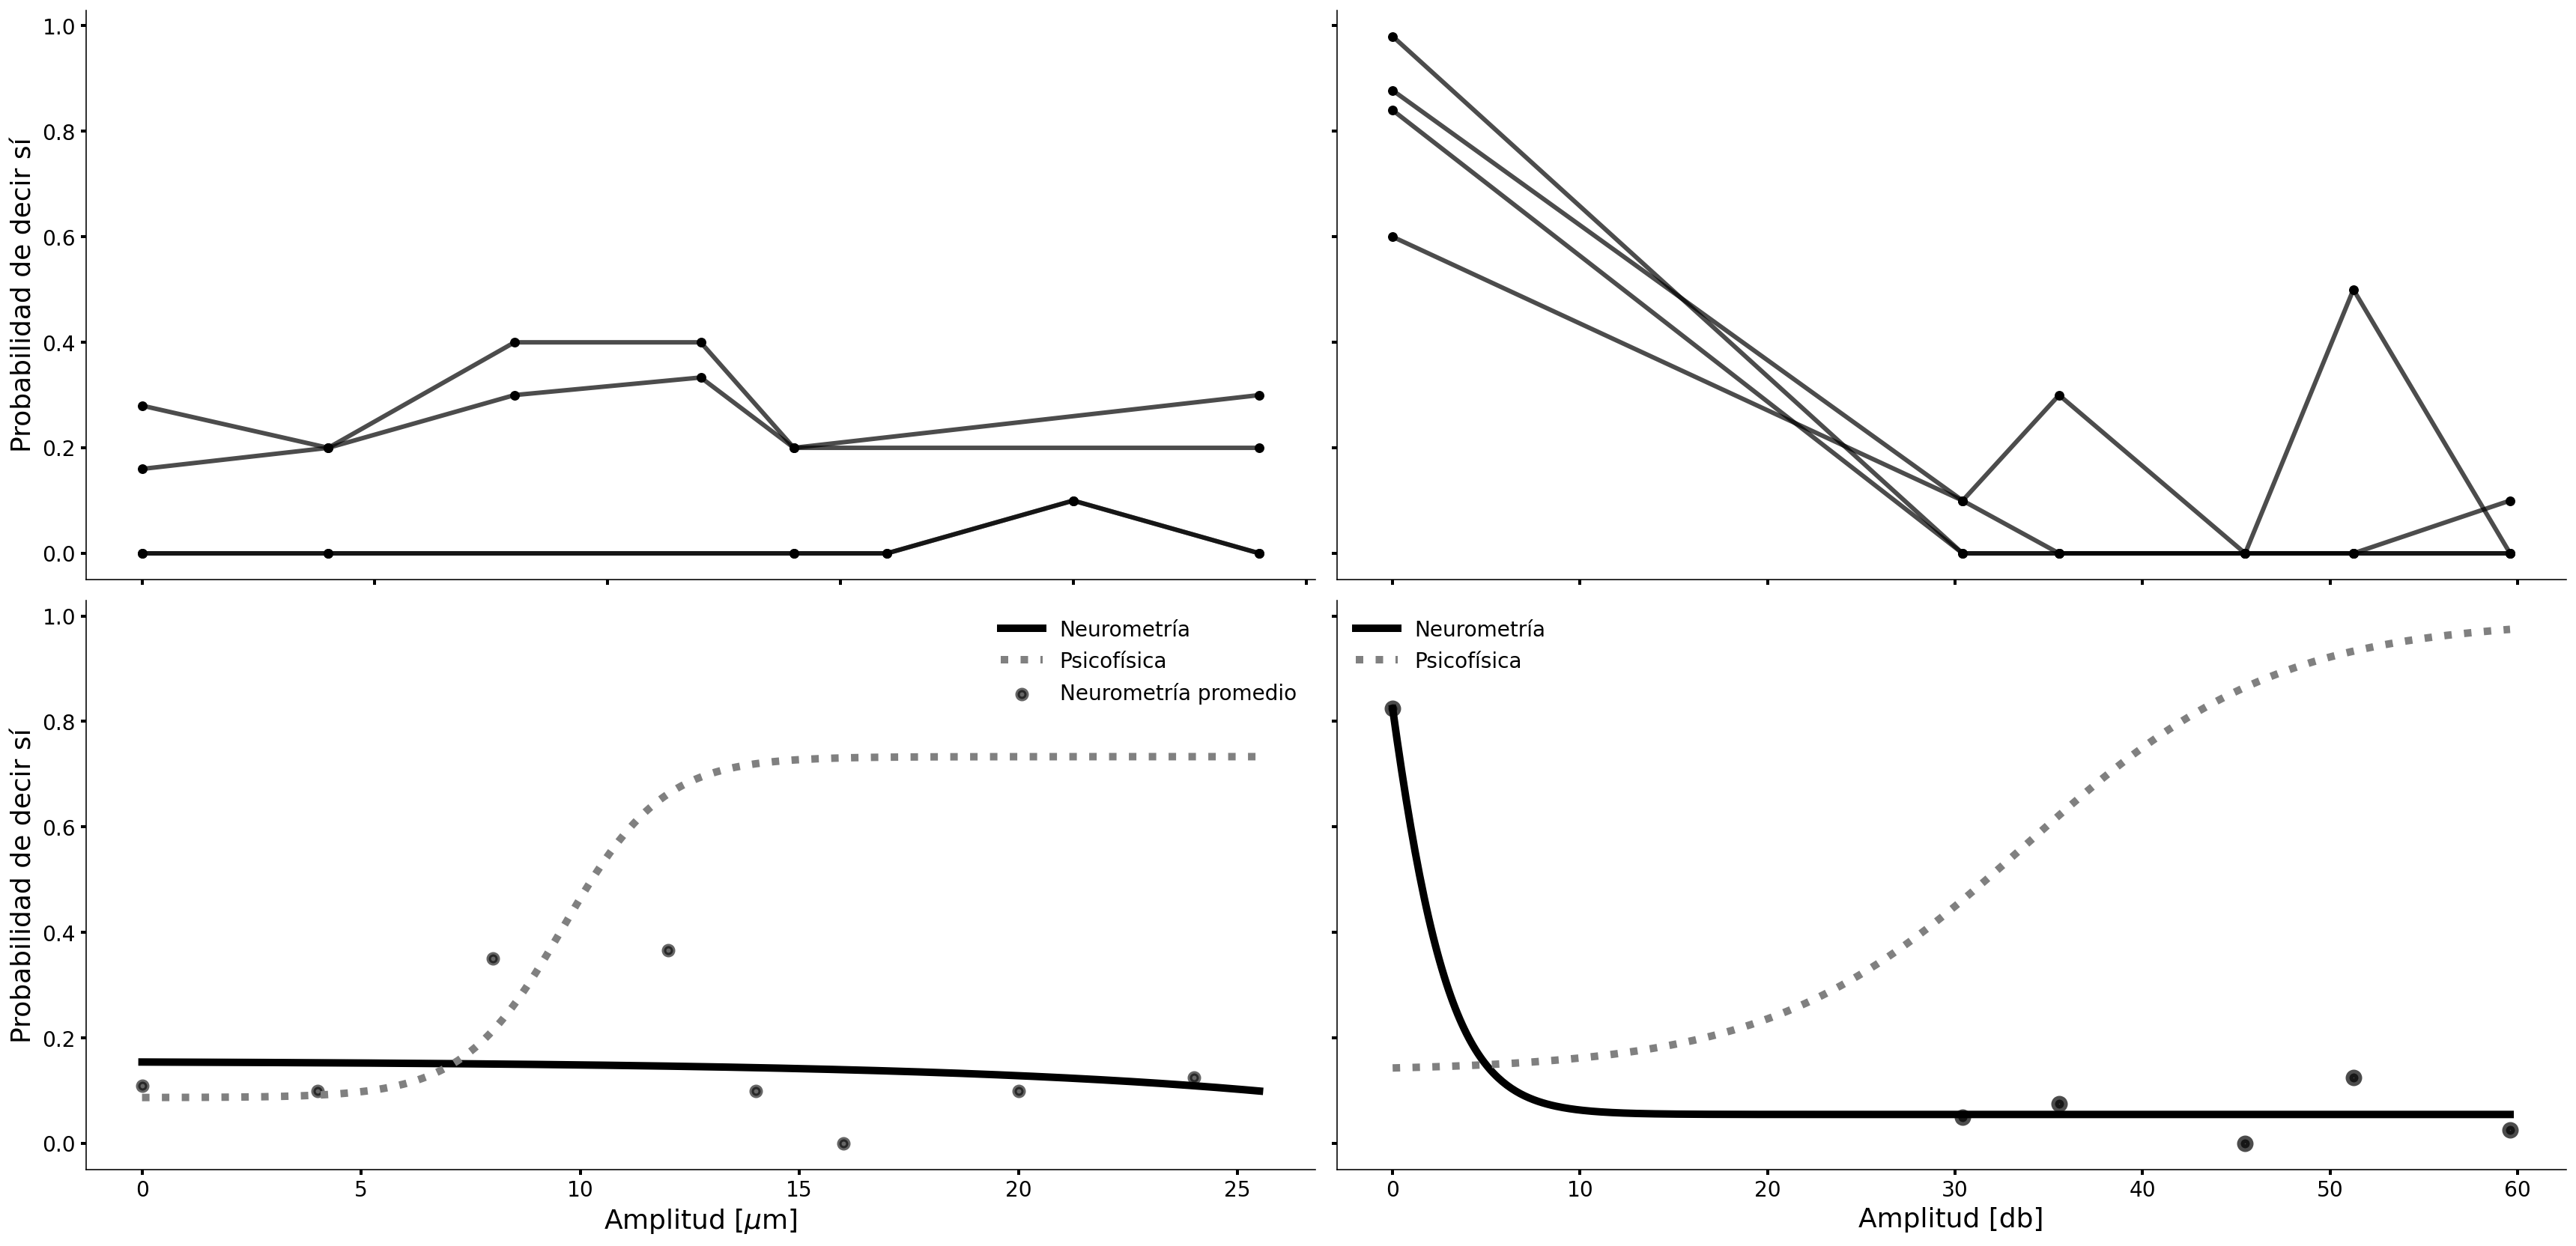

In [11]:
donde=where( (maskCR3*(mask3b))==1)[0]
fig, axes=plt.subplots(2, 2, figsize=(12*2, 9*1.3), sharey=True)
#fig.title("Neurometría promedio CR=1, RR033", fontsize=18, fontweight="normal")

# axes[0, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=16, fontweight="normal")
axes[0, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False) 

# axes[0, 1].set_xlabel("Amplitud [db]", fontsize=16, fontweight="normal")
# axes[0, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False) 

axes[1, 0].set_xlabel("Amplitud [${\mu}$m]", fontsize=18, fontweight="normal")
axes[1, 0].set_ylabel("Probabilidad de decir sí", fontsize=18, fontweight="normal")
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False) 

axes[1, 1].set_xlabel("Amplitud [db]", fontsize=18, fontweight="normal")
# axes[1, 1].set_ylabel("Probabilidad de decir sí", fontsize=16, fontweight="normal")
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False) 

# Modifica los ticks por subplot.
plt.sca(axes[0, 0])
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 0])
plt.xticks(fontsize=14, fontweight="normal")
plt.yticks(fontsize=14, fontweight="normal")
plt.sca(axes[1, 1])
plt.xticks(fontsize=14, fontweight="normal")

plt.sca(axes[0, 0])
plt.xticks([0,5, 10, 15, 20, 25], [ ])
plt.sca(axes[0, 1])
plt.xticks([0, 10, 20, 30, 40, 50, 60], [ ])

for i in range(2):
    axes[0, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[0, i].yaxis.set_tick_params(right=False, direction='out', width=2)
    axes[1, i].xaxis.set_tick_params(top=False, direction='out', width=2)
    axes[1, i].yaxis.set_tick_params(right=False, direction='out', width=2)


cont=0
for i in donde:
    xtactil=DicsetT[str(int(neurometria[i, indexes["setId"]]))]    
    axes[0, 0].plot(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", alpha=0.7, lw=3)    
    axes[0, 0].scatter(xtactil, neurometria[i, tactil[0:len(xtactil)]], color="black", s=30)   
    axes[0, 1].plot(ampA, neurometria[i, acustico], color="black", alpha=0.7, lw=3)
    axes[0, 1].scatter(ampA, neurometria[i, acustico], color="black", s=30)
    for j in range(6):
        xT_tot[cont]=xtactil[j]
        yT_tot[cont]=neurometria[i, tactil[j]]
        cont+=1
    
# Aquí empieza la gráfica global así como el correspondiente ajuste. 
gmodel=Model(sigmoidal) 
   #-- Gráfica auditiva global
yA=((neurometria[maskCR3*(mask3b),:])[:, acustico]).flatten()
xA=hstack(matlib.repmat(ampA, 1, len(yA)//6))
#axes[1, 1].scatter(xA, yA, color="black", alpha=0.7, lw=3)
axes[1, 1].scatter(ampA, mean((neurometria[maskCR3*(mask3b),:])[:, acustico],axis=0), color="black", alpha=0.7, lw=5)
fitting= gmodel.fit(data=yA, X=xA, a=1.0, b=0.0, c=13, d=5)  
xxA=linspace(0, xA[-1], 500)
y_fitting=sigmoidal(xxA, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 1].plot(xxA, y_fitting, color="black", lw=5, label="Neurometría")

    #-- Gráfica táctil global
ypromT=zeros((len(ampT)))
for i in range(len(ampT)): 
    ypromT[i]=mean(yT_tot[where(xT_tot[:cont]==ampT[i])[0]])
     
axes[1, 0].scatter(ampT, ypromT, color="black", alpha=0.6, lw=3, label="Neurometría promedio")
fitting= gmodel.fit(data=yT_tot[:cont], X=xT_tot[:cont], a=1.0, b=0.0, c=13, d=5)  
xx=linspace(0, 25.5, 500)
y_fitting=sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d'])
axes[1, 0].plot(xx, sigmoidal(xx, a=fitting.best_values['a'], b=fitting.best_values['b'], c=fitting.best_values['c'], d=fitting.best_values['d']), color="black", lw=5, label="Neurometría")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli
axes[1, 0].plot(xx, sigmoidal( xx, a=(psicofRR033[3])['a'], b=(psicofRR033[3])['b'], c=(psicofRR033[3])['c'], d=(psicofRR033[3])['d']), color="gray", lw=5, ls=':', label="Psicofísica")

#Files with the psicofphysics information for RR033 monkey: 
#Psychophycs correspondig to tactile simuli

axes[1, 1].plot(xxA, sigmoidal( xxA, a=(psicofRR033[4])['a'], b=(psicofRR033[4])['b'], c=(psicofRR033[4])['c'], d=(psicofRR033[4])['d']), color="gray", lw=5, ls=':', label="Psicofísica")
axes[1, 1].legend(loc='best', frameon=False, fontsize=14)
axes[1, 0].legend(loc='best', frameon=False, fontsize=14)
fig.tight_layout()
#Gráfica el ajuste a la psicofísica RR032
#a: 0.855188, b: 0.038533, c: 1.347210,  d: 10.559623
fig.savefig("Fourier_Neurometría_CR=3_3b_RR033.svg", dpi=700)